In [1]:
from voxelmorph.tf.layers import SpatialTransformer
import numpy as np
import matplotlib.pyplot as plt
import os
import nibabel as nb
import tensorflow as tf
import CMR_HFpEF_Analysis.functions_collection as ff
import CMR_HFpEF_Analysis.Image_utils as util

2023-08-17 15:23:42.539724: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
filename = '/mnt/mount_zc_NAS/HFpEF/data/contour_dataset/simulated_data/4/ED/ds/data_clean.nii.gz'
img_file = nb.load(filename)
gt_img = img_file.get_fdata()
gt_img = util.relabel(np.round(gt_img).astype(int),4,0)

filename = '/mnt/mount_zc_NAS/HFpEF/data/contour_dataset/simulated_data/4/ED/normal_motion_1/data_clean.nii.gz'
img_file = nb.load(filename)
img = img_file.get_fdata()
img= util.relabel(np.round(img).astype(int),4,0)


filename = '/mnt/mount_zc_NAS/HFpEF/data/contour_dataset/simulated_data/4/ED/normal_motion_2/data_clean.nii.gz'
img_file = nb.load(filename)
img2 = img_file.get_fdata()
img2 = util.relabel(np.round(img2).astype(int),4,0)

In [11]:
i = np.zeros([2, 128, 128, 1])
i[0,:,:,0] = img[:,:,4]
i[1,:,:,0] = img2[:,:,4]

i = tf.reshape(tf.convert_to_tensor(i), (2, i.shape[1], i.shape[2], 1))
i = tf.cast(i, dtype = tf.float32)
print(i.shape)

affine_matrix = np.zeros([2,2,3])
affine_matrix[0,...] = np.array([[1,0,2], [0,1,2]])
affine_matrix[1,...] = np.array([[1,0,0], [0,1,3]])
affine_matrix = tf.cast(tf.convert_to_tensor(affine_matrix), dtype = tf.float32)


s = SpatialTransformer(interp_method='nearest',indexing='ij',single_transform=False,fill_value=0,shift_center=True)((i, affine_matrix))
s = s.numpy() 

(2, 128, 128, 1)


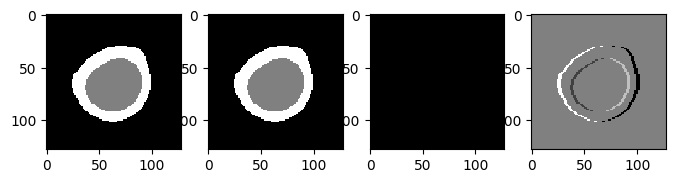

In [13]:
plt.figure(figsize = (8,2))
plt.subplot(141); plt.imshow(s[1,:,:,0], 'gray')
plt.subplot(142); plt.imshow(gt_img[:,:,4], 'gray')
plt.subplot(143); plt.imshow(gt_img[:,:,4] - s[1,:,:,0], 'gray')
plt.subplot(144); plt.imshow(gt_img[:,:,4] - i[1,:,:,0], 'gray')

In [17]:
import tensorflow as tf
image_1 = tf.constant([
    [[0, 0], [0, 1], [1, 1]],
    [[0,0], [0,1], [2,1]],
    [[2,2], [2,2], [0,2]]
], dtype=tf.float32)

image_2 = tf.constant([
    [[0, 0], [0, 0], [1, 1]],
    [[0,0], [0,1], [2,1]],
    [[2,2], [2,2], [2,2]]
], dtype=tf.float32)

class_mask1 = tf.cast(tf.equal(image_1, 2), dtype=tf.float32)
class_mask2 = tf.cast(tf.equal(image_2, 2), dtype=tf.float32)

intersection = tf.reduce_sum(class_mask1 * class_mask2)
union = tf.reduce_sum(class_mask1) + tf.reduce_sum(class_mask2)
dice = (2.0 * intersection + 1e-5) / (union + 1e-5)

print(intersection, union, dice)

tf.Tensor(6.0, shape=(), dtype=float32) tf.Tensor(13.0, shape=(), dtype=float32) tf.Tensor(0.923077, shape=(), dtype=float32)
